
# Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (Look at the picture below)

![SVM](./picture/SVM_1.png)

Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).

Above, we got accustomed to the process of segregating the two classes with a hyper-plane. Now the burning question is “How can we identify the right hyper-plane?”.

- **Identify the right hyper-plane (Scenario-1):** Here, we have three hyper-planes (A, B and C). Now, identify the right hyper-plane to classify star and circle.

![SVM](./picture/SVM_2.png)

You need to remember a thumb rule to identify the right hyper-plane: “Select the hyper-plane which segregates the two classes better”. In this scenario, hyper-plane “B” has excellently performed this job.

- **Identify the right hyper-plane (Scenario-2):** Here, we have three hyper-planes (A, B and C) and all are segregating the classes well. Now, How can we identify the right hyper-plane?

![SVM](./picture/SVM_3.png)

Here, maximizing the distances between nearest data point (either class) and hyper-plane will help us to decide the right hyper-plane. This distance is called as Margin. Let’s look at the below snapshot:

![SVM](./picture/SVM_4.png)

Above, you can see that the margin for hyper-plane C is high as compared to both A and B. Hence, we name the right hyper-plane as C. Another lightning reason for selecting the hyper-plane with higher margin is robustness. If we select a hyper-plane having low margin then there is high chance of miss-classification.

- **Identify the right hyper-plane (Scenario-3):** Hint: Use the rules as discussed in previous section to identify the right hyper-plane

![SVM](./picture/SVM_5.png)

Some of us may have selected the hyper-plane B as it has higher margin compared to A. But, here is the catch, SVM selects the hyper-plane which classifies the classes accurately prior to maximizing margin. Here, hyper-plane B has a classification error and A has classified all correctly. Therefore, the right hyper-plane is A.


## Mathematical Part of SVM

The predicted label for some input feature vector **"X"** is given like this:-
$$ Y = sign(W*X - B)$$

where , **"sing"** is a mathematical operator that takes any values as input and returns **+1** if the input is a positive number or **-1** if the input is a negative number

The goal of the learning algorithm is to leverage the dataset and find the optimal values **"W"** and **"B"** for parameter W and B. 
Once the learning algorithm identifies these optimal values, the model $f(X)$ is defined as:
$$ F(X) = sign(W*X + B)$$

Now, how does the machine find **"W"** and **"B"** ?

It solves an optimization problem, Machine are good at optimiing function under constraints
So, the constraints are naturally:-

$$ W*X_i - B >= 1 $$ if $Y_i = +1$
and $$ W*X_i -B <= -1 $$ if $ Y_i = -1$

We would also prefer that the hyperplane seperates positive example from negative example with the largest possible margine
- The margine is the distance between the closest examples of two classes.
A large margine contributes to a better generalization, that is how well model will classify new examples in the future
To Achieve that, we need to maximize the Euclidean norm of **||W||** and given by :-\
$$ \sqrt{\sum_{j=0}^D(W^{(j)})^2}$$

Geometrically, the equations $W*X - B = 1$ and $ W*X - B = -1$ defined two parallel hyperplanes.
The distance between these hyperplanes is given by $\frac{2}{||W||}$ , So the smaller the norm **||W||** , the larger the distance between these two hyperplanes.

Minimizing ||W|| is equivalent to manimizing $\frac{1}{2}||W||^2$ , and the use of this term makes it possible to perform quadratic programming optimization later on.

The optimization problem for **SVM** therefore looks like:
$$ min\frac{1}{2}||W||^2 $$ 
such that , $ Y_i(X_iW - B) - 1 >= 0$, where i = 1,2,3,....,N


Let's see how to perform the Support Vector Classification Using **SKLearn** library


In [1]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC

df = pd.read_csv('dataset/breast_cancer_wisconsin.data')
df.replace('?' , -99999 ,inplace =True)
df.drop(['id'] , 1 , inplace =True)

In [2]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
from sklearn.model_selection import train_test_split

X = np.array(df.drop(['class'], 1 ))
Y = np.array(df['class'])

x_train , x_test, y_train, y_test = train_test_split(X , Y , test_size = 0.2 )

In [4]:
clf = SVC()
clf.fit(x_train , y_train)
accuracy = clf.score(x_test , y_test)
print(accuracy)

0.6071428571428571


## SVM from Scratch:-



In [5]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 
style.use('ggplot')

data_dict = {-1 : np.array([[1 , 7],
                            [2 , 8],
                            [3 , 8],]), 
              1 : np.array([[5 , 1],
                            [6 , -1],
                            [7 , 3],])}



optimized a step.
 optimized a step.
 optimized a step.


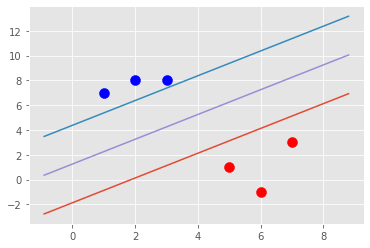

In [17]:
class Support_Vector_Machine:
    def __init__(self , visulazation = True):
        self.visulazation = visulazation
        self.colors = {1 : 'r' , -1 : 'b'}
        if self.visulazation:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # Train
    def fit(self , data):
        self.data = data
        opt_dict = {}
        # {||w|| :  [w,b]}
        transforms = [[1,1],
                     [-1,1],
                     [1,-1],
                     [-1,-1]]
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)


        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None


        step_sizes = [self.max_feature_value*0.5,
                      self.max_feature_value*0.1,
                      # point of expense
                      self.max_feature_value*0.01,]
        # extremly expensive
        b_range_multiple = 5
        # we don't need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum , latest_optimum])
            # we can do this because convex
            optimized = False

            while not optimized:

                for b in np.arange(-1*(self.max_feature_value * b_range_multiple),
                                    self.max_feature_value * b_range_multiple , step * b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w + b) >= 1
                        #
                        # ##### add a break here later...
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t , xi) + b) >=1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t , b]

                if w[0] < 0:
                    optimized = True
                    print(' optimized a step.')
                else:
                    w = w - step 

        norms = sorted([n for n in opt_dict])
        # ||w|| : [w,b]
        opt_choice = opt_dict[norms[0]]
        self.w = opt_choice[0]
        self.b = opt_choice[1]
        latest_optimum = opt_choice[0][0] + step * 2


    def predict(self , features):
        # sign(x.w + b)
        classification = np.sign(np.dot(np.array(features) , self.w ) + self.b)
        if classification != 0 and self.visulazation:
            self.ax.scatter(features[0] , features[1] , s=200 , marker= '*', c=self.colors[classification])
        

        return classification

    def visulazations(self):
       [[ self.ax.scatter(x[0] , x[1], s=100, color= self.colors[i]) for x in data_dict[i]] for i in data_dict]

       # hyperplane = x*w + b
       # v = x*w + b
       # psv = 1
       # nsv = -1
       # dec = 0
       def hyperplane(x, w, b, v):
           return (-w[0]*x-b+v) / w[1]
        
       datarange = (self.min_feature_value * 0.9 , self.max_feature_value * 1.1)
       hyp_x_min = datarange[0]
       hyp_x_max = datarange[1]

        # (w*x  + b) = 1
       # positive support vector hyperplane

       psv1 = hyperplane(hyp_x_min , self.w , self.b , 1)
       psv2 = hyperplane(hyp_x_max , self.w , self.b , 1)
       self.ax.plot([hyp_x_min , hyp_x_max] , [ psv1 , psv2])

       # (w*x  + b) = -1
       # # negative support vector hyperplane

       nsv1 = hyperplane(hyp_x_min , self.w , self.b , -1)
       nsv2 = hyperplane(hyp_x_max , self.w , self.b , -1)
       self.ax.plot([hyp_x_min , hyp_x_max] , [ nsv1 , nsv2])
       
       # (w*x  + b) = 0
       # decision boundary of support vector hyperplane
       dv1 = hyperplane(hyp_x_min , self.w , self.b , 0)
       dv2 = hyperplane(hyp_x_max , self.w , self.b , 0)
       self.ax.plot([hyp_x_min , hyp_x_max] , [ dv1 , dv2])

        



svm =  Support_Vector_Machine()
svm.fit(data = data_dict)
svm.visulazations()

